In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,error_rate,time
0,0.173882,0.020544,0.006089,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.054308,0.019674,0.006089,01:05


In [8]:
from fastbook import *
urls = search_images_ddg('grizzly bear', max_images=100)
len(urls),urls[0]

C:\Users\jaehwi\anaconda3\envs\fastaibook\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


(100, 'http://elelur.com/data_images/mammals/grizzly-bear/grizzly-bear-08.jpg')

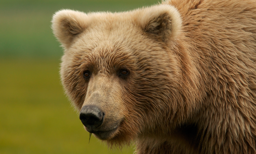

In [27]:
download_url(urls[99], 'images/bear.jpg')
im = Image.open('images/bear.jpg')
im.thumbnail((256,256))
im

In [ ]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

# if not path.exists():
path.mkdir()
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear', max_images=20)
    print(len(results))
    download_images(dest, urls=results.attrgot('contentUrl'))

In [28]:
??download_images

Signature:
download_images(
    dest,
    url_file=None,
    urls=None,
    max_pics=1000,
    n_workers=8,
    timeout=4,
    preserve_filename=False,
)
Source:   
def download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False):
    "Download images listed in text file `url_file` to path `dest`, at most `max_pics`"
    if urls is None: urls = url_file.read_text().strip().split("\n")[:max_pics]
    dest = Path(dest)
    dest.mkdir(exist_ok=True)
    parallel(partial(_download_image_inner, dest, timeout=timeout, preserve_filename=preserve_filename),
             list(enumerate(urls)), n_workers=n_workers, threadpool=True)
File:      c:\users\jaehwi\anaconda3\envs\fastaibook\lib\site-packages\fastai\vision\utils.py
Type:      function


In [29]:
??results.attrgot

Signature: results.attrgot(k, default=None)
Docstring: Create new `L` with attr `k` (or value `k` for dicts) of all `items`.
Source:   
    def attrgot(self, k, default=None):
        return self.map(lambda o: o.get(k,default) if isinstance(o, dict) else nested_attr(o,k,default))
File:      c:\users\jaehwi\anaconda3\envs\fastaibook\lib\site-packages\fastcore\foundation.py
Type:      method
